### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

In [1]:
# installing dependencies
!pip3 install pandas
!pip3 install matplotlib.pyplot
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [11]:
# importing the data as dataframes
import pandas as pd

emotion_raw_df = pd.read_csv('../exports/emotion_raw.csv')
go_emotions_raw_df = pd.read_csv('../exports/go_emotions_raw.csv')

pd.set_option('display.max_columns', None)

In [13]:
emotion_raw_df.head()

,Unnamed: 0,text,label
0,0,i feel awful about it too because it s my job ...,0
1,1,im alone i feel awful,0
2,2,ive probably mentioned this before but i reall...,1
3,3,i was feeling a little low few days back,0
4,4,i beleive that i am much more sensitive to oth...,2


In [15]:
emotion_raw_df.dtypes

Unnamed: 0     int64
text          object
label          int64
dtype: object

In [16]:
emotion_raw_df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [17]:
emotion_raw_df.describe()

,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


## Analysis of emotion_df
#### Data Types and Features:

1. text: Object (string), contains the text data for sentiment analysis.
2. label: Integer, represents the sentiment category.

3. Missing Values:
- No missing values in any of the columns, which is good for data integrity.
4. Descriptive Statistics:

- The Unnamed: 0 column seems to be an index, so its statistics might not be relevant for analysis.
- Label has values ranging from 0 to 5, indicating multiple sentiment categories. The mean, median (50%), and distribution will help understand the balance of these categories.

- Checking for Non-Empty but Irrelevant Entries

In [22]:
# Check for entries that do not contain alphabetic characters
go_non_relevant_texts = emotion_raw_df[~emotion_raw_df['text'].str.contains('[a-zA-Z]')]
go_non_relevant_texts_count = go_non_relevant_texts.shape[0]

go_non_relevant_texts_count

0

zero non text fields, Great!!!

--------------

In [26]:
go_emotions_raw_df.head()

,Unnamed: 0,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
go_emotions_raw_df.dtypes

Unnamed: 0                int64
text                     object
id                       object
author                   object
subreddit                object
link_id                  object
parent_id                object
created_utc             float64
rater_id                  int64
example_very_unclear       bool
admiration                int64
amusement                 int64
anger                     int64
annoyance                 int64
approval                  int64
caring                    int64
confusion                 int64
curiosity                 int64
desire                    int64
disappointment            int64
disapproval               int64
disgust                   int64
embarrassment             int64
excitement                int64
fear                      int64
gratitude                 int64
grief                     int64
joy                       int64
love                      int64
nervousness               int64
optimism                  int64
pride   

In [19]:
go_emotions_raw_df.isnull().sum()

Unnamed: 0              0
text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
dtype: int64

In [24]:
# Check for entries that do not contain alphabetic characters
go_non_relevant_texts = go_emotions_raw_df[~go_emotions_raw_df['text'].str.contains('[a-zA-Z]')]
go_non_relevant_texts_count = go_non_relevant_texts.shape[0]

go_non_relevant_texts_count

17

In [27]:
go_non_relevant_texts

,Unnamed: 0,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
6664,6664,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,1.546370e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16910,16910,(:),edkjb9g,EMORAP,Roadcam,t3_adu8rg,t3_adu8rg,1.546967e+09,16,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20020,20020,:^(,ed2o064,BelialLedah,chelseafc,t3_absiob,t3_absiob,1.546431e+09,26,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26790,26790,(:),edkjb9g,EMORAP,Roadcam,t3_adu8rg,t3_adu8rg,1.546967e+09,42,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63452,63452,😘 ☂ ☂️☂️,eepzlq4,FearGarbhArMait,LifeProTips,t3_aiimhd,t1_eepu71l,1.548194e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66808,66808,:((,eerg0xa,badmemss,traaaaaaannnnnnnnnns,t3_aiyhw1,t3_aiyhw1,1.548247e+09,30,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
85602,85602,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,1.546370e+09,3,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87838,87838,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,1.546370e+09,72,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89246,89246,:^(,ed2o064,BelialLedah,chelseafc,t3_absiob,t3_absiob,1.546431e+09,20,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
109849,109849,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,1.546370e+09,12,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


seems like these are all emojis, but they dont seem to be labeled well, but what we should also check first if there are rows that are not labeled at all, or that are labeled with 2 or more emotions, for that the best is to tokenize it right away:

In [28]:
def tokenize_emotions(df, emotion_columns):
    # Creating a new column for the tokenized label
    df["emotion_label"] = -2  # default value indicating no emotion

    for index, row in df.iterrows():
        emotions = row[emotion_columns]
        labeled_emotions = emotions[emotions == 1]

        if len(labeled_emotions) > 1:
            df.at[index, "emotion_label"] = -1  # multiple emotions
        elif len(labeled_emotions) == 1:
            emotion_index = labeled_emotions.idxmax()
            df.at[index, "emotion_label"] = emotion_columns.index(emotion_index)

    return df


# List of emotion columns
emotion_columns = [
    "admiration",
    "amusement",
    "anger",
    "annoyance",
    "approval",
    "caring",
    "confusion",
    "curiosity",
    "desire",
    "disappointment",
    "disapproval",
    "disgust",
    "embarrassment",
    "excitement",
    "fear",
    "gratitude",
    "grief",
    "joy",
    "love",
    "nervousness",
    "optimism",
    "pride",
    "realization",
    "relief",
    "remorse",
    "sadness",
    "surprise",
    "neutral",
]

# Tokenize the emotions in the dataset
go_emotions_tokenized = tokenize_emotions(go_emotions_raw_df, emotion_columns)

# Check the first few rows of the modified dataset
print(go_emotions_tokenized.head())

   Unnamed: 0                                               text       id  \
0           0                                    That game hurt.  eew5j0j   
1           1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2           2     You do right, if you don't care then fuck 'em!  ed2mah1   
3           3                                 Man I love reddit.  eeibobj   
4           4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  amusement  anger  \
0  1.548381e+09         1          

-1 -> multiple emotions
-2 -> no emotions labeled

In [29]:
emotion_label_distribution = go_emotions_tokenized['emotion_label'].value_counts()
print(emotion_label_distribution)


emotion_label
 27    55298
-1     35994
 4     11259
 0     10531
 3      8342
 10     7686
 15     7075
 1      6130
 7      5885
 2      5202
 18     4957
 6      4938
 22     4714
 9      4706
 20     4519
 17     4329
 25     3827
 5      3523
 26     3472
-2      3411
 13     3020
 11     2914
 8      2147
 14     1778
 24     1510
 12     1433
 19      796
 23      788
 21      690
 16      351
Name: count, dtype: int64


In [30]:
# Filter the dataset for entries with multiple emotions
multi_emotion_entries = go_emotions_tokenized[go_emotions_tokenized['emotion_label'] == -1]

# Count the occurrences of each emotion in these entries
multi_emotion_distribution = multi_emotion_entries[emotion_columns].sum()
print(multi_emotion_distribution)


admiration        6600
amusement         3115
anger             2882
annoyance         5276
approval          6361
caring            2476
confusion         2421
curiosity         3807
desire            1670
disappointment    3763
disapproval       3738
disgust           2387
embarrassment     1043
excitement        2609
fear              1419
gratitude         4550
grief              322
joy               3654
love              3234
nervousness       1014
optimism          4196
pride              612
realization       4071
relief             501
remorse           1015
sadness           2931
surprise          2042
neutral              0
dtype: int64


                admiration  amusement     anger  annoyance  approval  \
admiration        1.000000  -0.048052 -0.123131  -0.164308  0.037574   
amusement        -0.048052   1.000000 -0.067142  -0.084260 -0.034323   
anger            -0.123131  -0.067142  1.000000   0.280328 -0.107972   
annoyance        -0.164308  -0.084260  0.280328   1.000000 -0.141147   
approval          0.037574  -0.034323 -0.107972  -0.141147  1.000000   
caring           -0.058155  -0.061794 -0.059962  -0.082225  0.001275   
confusion        -0.080811  -0.028214 -0.046120  -0.057663 -0.068584   
curiosity        -0.087793  -0.035493 -0.066845  -0.073057 -0.080237   
desire           -0.028746  -0.040177 -0.049015  -0.068261 -0.035711   
disappointment   -0.120142  -0.075783 -0.007461   0.051967 -0.109270   
disapproval      -0.125771  -0.059111 -0.009831   0.126448 -0.123340   
disgust          -0.098010  -0.051058  0.090042   0.078639 -0.083961   
embarrassment    -0.058316  -0.021951 -0.001533  -0.008374 -0.05

/Users/jaa/Library/Python/3.9/lib/python/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


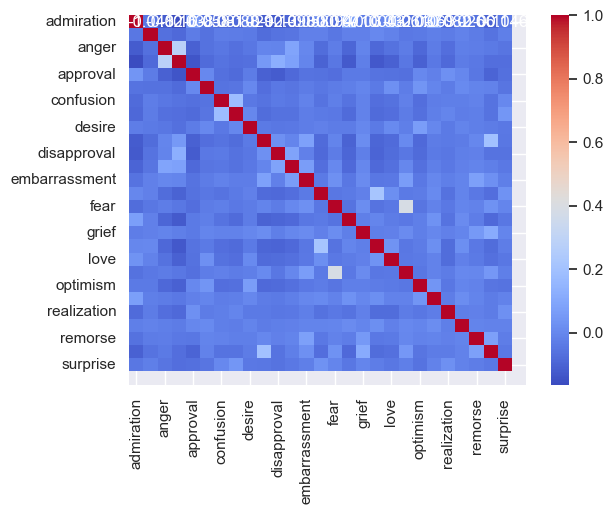

<Figure size 10000x7500 with 0 Axes>

In [43]:
# Compute the correlation matrix for the multi-emotion entries
multi_emotion_correlation = multi_emotion_entries[emotion_columns].corr()

# You can then print the correlation matrix
print(multi_emotion_correlation)

# Optionally, for a more visual interpretation, you could use a heatmap
# For this, you would need seaborn, a Python visualization library.
# Here's an example code to create a heatmap:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(multi_emotion_correlation, annot=True, cmap='coolwarm')

plt.figure(figsize=(100, 75))  # You can adjust these dimensions as needed

# Increase font size for readability
sns.set(font_scale=0.7)

# Show the plot
plt.show()


So one transformation that will definitely need to be done is transforming the many labels into less labels, this could also help with having multiple labels on one entry, what we want is to have one label per entry, represented by a token. Therefore we will need to pick what the categories and their respective labels and then map them to it, then we can retry the analysis to see if there is more to clean, or if that will take care of the multilabeling problem. But what is certain, will have to explore more solutions.

### 8\. Document What You Have Learned

#### Overview

As a group of newly hired data scientists at MetaData Inc., we embarked on a project to perform sentiment analysis on user-generated content. We utilized two datasets, `emotion_df` and `go_emotions_df`, both of which provided a rich source of textual data and associated sentiment labels.

#### Key Findings from `emotion_df`

*   **Dataset Structure:** The dataset consists of textual data along with sentiment labels. The sentiments are numerically labeled, ranging from 0 to 5.
*   **Data Integrity:** There are no missing values in the dataset, ensuring consistency for analysis.
*   **Label Distribution:** The sentiment labels are well-distributed, although the exact balance of these categories will require further analysis to ascertain.

#### Key Findings from `go_emotions_df`

*   **Complex Dataset Structure:** This dataset is more intricate, with numerous columns for different emotions, each represented as a binary indicator.
*   **No Missing Values:** Similar to `emotion_df`, this dataset also does not have missing values, which is beneficial for maintaining data quality.
*   **Multi-Label Entries:** A significant number of entries (35,994) have multiple emotions labeled. We assigned these a unique label `-1`.
*   **Entries Without Emotions:** Some entries lack emotion labels, assigned a label `-2`.
*   **Emotion Correlations:** The correlation matrix and heatmap revealed interesting patterns of emotion co-occurrence. Certain emotions like `joy` and `love`, `anger` and `disapproval`, etc., showed higher correlations, suggesting they often appear together.

#### Challenges and Learnings

*   **Handling Multi-Label Data:** One of the key challenges was managing entries with multiple emotions. The exploration revealed the complexity of human emotions in textual data and the need for careful consideration in how these are treated in modeling.
*   **Interpretation of Emotion Correlations:** Understanding the correlation between different emotions was insightful. It highlighted the nuanced nature of sentiment analysis and the importance of context in interpreting emotions.
*   **Data Preprocessing:** Both datasets underscored the importance of thorough data preprocessing, including dealing with non-standard or irrelevant entries, before any modeling can be done.

#### Future Steps

*   **Model Development:** With the data exploration complete, the next phase would involve developing a machine learning model to perform sentiment analysis. This will include data preprocessing, feature engineering, model selection, and training.
*   **Handling Multi-Label Complexity:** We need to strategize how to handle the multi-label aspect in the `go_emotions_df` dataset, possibly exploring multi-label classification techniques.
*   **In-depth Analysis of Sentiment Labels:** A more detailed analysis of the distribution of sentiment labels in both datasets will be beneficial to understand any imbalances and how they might affect model training and accuracy.